In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn
import collections

## 1. Reading and Understanding the data

In [2]:
sinfo = pd.read_csv('studentInfo.csv')
sinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [3]:
sinfo.count()

code_module             32593
code_presentation       32593
id_student              32593
gender                  32593
region                  32593
highest_education       32593
imd_band                32593
age_band                32593
num_of_prev_attempts    32593
studied_credits         32593
disability              32593
final_result            32593
dtype: int64

In [4]:
asm =  pd.read_csv('assessments.csv')
asm.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


In [5]:
sasm = pd.read_csv('studentAssessment.csv')
sasm.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


In [6]:
sreg = pd.read_csv('studentRegistration.csv')
sreg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


In [7]:
svle = pd.read_csv('studentVle.csv')
svle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [8]:
vle = pd.read_csv('vle.csv')
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


In [9]:
crs = pd.read_csv('courses.csv')
crs.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [10]:
crs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
code_module                   22 non-null object
code_presentation             22 non-null object
module_presentation_length    22 non-null int64
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


## 2. Selecting pertinent attributes

### 2a. Demographic Analysis

In [11]:
sinfo = sinfo.iloc[:,[0,1,2,5,6,7,11]] #some columns are dropped
sinfo.head()

,code_module,code_presentation,id_student,highest_education,imd_band,age_band,final_result
0,AAA,2013J,11391,HE Qualification,90-100%,55<=,Pass
1,AAA,2013J,28400,HE Qualification,20-30%,35-55,Pass
2,AAA,2013J,30268,A Level or Equivalent,30-40%,35-55,Withdrawn
3,AAA,2013J,31604,A Level or Equivalent,50-60%,35-55,Pass
4,AAA,2013J,32885,Lower Than A Level,50-60%,0-35,Pass


### 2b. Assessment Analysis

In [12]:
sasm = sasm.iloc[:,[0,1,2,4]]
asm_combined = pd.merge(sasm, asm, how = 'inner', on=['id_assessment']) #inner join on id_assessment

In [13]:
#Replacing ? with np.nan for date and score

#swapping using temp variable val1
val1 = asm_combined['score'].values
val1[val1 == '?'] = np.nan
asm_combined['score'] = val1

#swapping using temp variable val2
val2 = asm_combined['date'].values
val2[val2 == '?'] = np.nan
asm_combined['date'] = val2

#Converting to float for ease of calculations
asm_combined[['date','score']] = asm_combined[['date','score']].astype('float')

In [14]:
#Calculating mean score
mean_score = asm_combined.groupby(['id_student','code_module','code_presentation'], as_index=False).aggregate(np.mean).iloc[:,[0,1,2,5]]
mean_score.rename(columns = {'score':'Mean_Score'}, inplace = True)

#Calculating mean CMA
df1 = asm_combined.groupby(['id_student','code_module','code_presentation','assessment_type'], as_index=False).aggregate(np.mean)
mean_CMA = df1[df1['assessment_type'] == 'CMA'].iloc[:,[0,1,2,6]]
mean_CMA.rename(columns = {'score':'CMA_Score'}, inplace = True)
#Calculating mean TMA
mean_TMA = df1[df1['assessment_type'] == 'TMA'].iloc[:,[0,1,2,6]]
mean_TMA.rename(columns = {'score':'TMA_Score'}, inplace = True)
#Calculating mean Exam
mean_Exam = df1[df1['assessment_type'] == 'Exam'].iloc[:,[0,1,2,6]]
mean_Exam.rename(columns = {'score':'Exam_Score'}, inplace = True)

In [15]:
#Merging all the scores together
df_all = pd.merge(mean_score, mean_CMA, how='left', on = ['id_student','code_module','code_presentation']).merge(
    mean_TMA, how = 'left', on = ['id_student','code_module','code_presentation']).merge(
    mean_Exam, how = 'left', on = ['id_student','code_module','code_presentation'])

df_all.head()

,id_student,code_module,code_presentation,Mean_Score,CMA_Score,TMA_Score,Exam_Score
0,6516,AAA,2014J,61.800000,NaN,61.800000,NaN
1,8462,DDD,2013J,87.666667,NaN,87.666667,NaN
2,8462,DDD,2014J,86.500000,NaN,86.500000,NaN
3,11391,AAA,2013J,82.000000,NaN,82.000000,NaN
4,23629,BBB,2013B,82.500000,100.0,65.000000,NaN


### 2c. Interaction & Content Analysis

In [16]:
#aggregate  sum of clicks
sum_clicks = svle.groupby(['id_student','code_module','code_presentation'], as_index = False).sum().iloc[:,[0,1,2,5]]

#sum of days extracted
sum_days = svle.groupby(['id_student','code_module','code_presentation'], as_index = False)['date'].apply(lambda x: len(x.unique())).reset_index()
sum_days.rename(columns = {0:'days_interacted'}, inplace = True)

#Calculating daily clicks
vle_clicks = pd.merge(sum_clicks, sum_days, how = 'inner', on = ['id_student','code_module','code_presentation'])
vle_clicks['daily_click'] = vle_clicks['sum_click']/vle_clicks['days_interacted']

#Calculating material counts of each course module and semester
vle_type = vle.iloc[:,[0,1,2,3]]
vle_type = vle_type.groupby(['code_module','code_presentation','activity_type'], as_index=False).count()
vle_type.rename(columns = {'id_site':'count'}, inplace = True)

vle_pivot = pd.pivot_table(vle_type, index=['code_module','code_presentation'],columns='activity_type').reset_index()
vle_pivot.index.name = None
vle_pivot.columns = [' '.join(col).strip() for col in vle_pivot.columns.values]
vle_pivot.fillna(value=0, inplace = True)



In [17]:

#Merge above tables
vle_combined = pd.merge(vle_clicks, vle_pivot, how = 'inner')
vle_combined.head()

,id_student,code_module,code_presentation,sum_click,days_interacted,daily_click,count dataplus,count dualpane,count externalquiz,count folder,...,count ouelluminate,count ouwiki,count page,count questionnaire,count quiz,count repeatactivity,count resource,count sharedsubpage,count subpage,count url
0,6516,AAA,2014J,2791,159,17.553459,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,6.0,20.0
1,24734,AAA,2014J,499,56,8.910714,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,6.0,20.0
2,26192,AAA,2014J,2223,118,18.838983,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,6.0,20.0
3,28061,AAA,2014J,1590,148,10.743243,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,6.0,20.0
4,31600,AAA,2014J,429,19,22.578947,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,6.0,20.0


### 2d. Combining all Analyses

In [18]:
df_all = df_all.merge(sinfo, how = 'right', on = ['id_student','code_module','code_presentation'])
df_all = df_all.merge(sreg, how='left', on = ['id_student','code_module','code_presentation'])
df_all = df_all.merge(vle_combined, how='left', on = ['id_student','code_module','code_presentation'])

df_all

,id_student,code_module,code_presentation,Mean_Score,CMA_Score,TMA_Score,Exam_Score,highest_education,imd_band,age_band,...,count ouelluminate,count ouwiki,count page,count questionnaire,count quiz,count repeatactivity,count resource,count sharedsubpage,count subpage,count url
0,6516,AAA,2014J,61.800000,NaN,61.800000,NaN,HE Qualification,80-90%,55<=,...,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,6.0,20.0
1,8462,DDD,2013J,87.666667,NaN,87.666667,NaN,HE Qualification,30-40%,55<=,...,0.0,4.0,0.0,0.0,0.0,0.0,178.0,0.0,194.0,44.0
2,8462,DDD,2014J,86.500000,NaN,86.500000,NaN,HE Qualification,30-40%,55<=,...,0.0,1.0,0.0,0.0,0.0,0.0,169.0,0.0,110.0,46.0
3,11391,AAA,2013J,82.000000,NaN,82.000000,NaN,HE Qualification,90-100%,55<=,...,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,6.0,18.0
4,23629,BBB,2013B,82.500000,100.000000,65.000000,NaN,Lower Than A Level,20-30%,0-35,...,1.0,0.0,0.0,0.0,5.0,0.0,236.0,1.0,37.0,15.0
5,23698,CCC,2014J,74.444444,75.000000,72.500000,80.0,A Level or Equivalent,50-60%,0-35,...,0.0,0.0,2.0,0.0,16.0,0.0,85.0,0.0,31.0,19.0
6,23798,BBB,2013J,93.909091,100.000000,88.833333,NaN,A Level or Equivalent,50-60%,0-35,...,0.0,0.0,0.0,0.0,5.0,0.0,236.0,1.0,38.0,15.0
7,24186,GGG,2014B,62.500000,63.333333,60.000000,NaN,Lower Than A Level,10-20,0-35,...,0.0,0.0,0.0,0.0,9.0,0.0,81.0,0.0,5.0,0.0
8,24213,DDD,2014B,76.285714,NaN,79.333333,58.0,A Level or Equivalent,40-50%,0-35,...,0.0,2.0,0.0,0.0,0.0,0.0,177.0,0.0,193.0,41.0
9,24391,GGG,2013J,88.888889,93.333333,80.000000,NaN,A Level or Equivalent,80-90%,0-35,...,0.0,0.0,0.0,0.0,9.0,0.0,95.0,0.0,5.0,0.0


In [19]:
#Calculating values of each column inthe dataframe above
df_all.count()

id_student              32593
code_module             32593
code_presentation       32593
Mean_Score              25820
CMA_Score               15100
TMA_Score               24788
Exam_Score               4959
highest_education       32593
imd_band                32593
age_band                32593
final_result            32593
date_registration       32593
date_unregistration     32593
sum_click               29228
days_interacted         29228
daily_click             29228
count dataplus          29228
count dualpane          29228
count externalquiz      29228
count folder            29228
count forumng           29228
count glossary          29228
count homepage          29228
count htmlactivity      29228
count oucollaborate     29228
count oucontent         29228
count ouelluminate      29228
count ouwiki            29228
count page              29228
count questionnaire     29228
count quiz              29228
count repeatactivity    29228
count resource          29228
count shar

In [20]:
# save it as proc_data.csv
df_all.to_csv('proc_data.csv')

In [21]:
df_all = pd.read_csv('proc_data.csv', na_values='?')
# Rearranging columns
df_all = df_all[['id_student', 'code_module', 'code_presentation', 'Mean_Score',
       'CMA_Score', 'TMA_Score', 'Exam_Score', 'highest_education', 'imd_band',
       'age_band', 'date_registration', 'sum_click',
       'days_interacted', 'daily_click', 'count dataplus', 'count dualpane',
       'count externalquiz', 'count folder', 'count forumng', 'count glossary',
       'count homepage', 'count htmlactivity', 'count oucollaborate',
       'count oucontent', 'count ouelluminate', 'count ouwiki', 'count page',
       'count questionnaire', 'count quiz', 'count repeatactivity',
       'count resource', 'count sharedsubpage', 'count subpage', 'count url', 'final_result']]
df_all.head()

,id_student,code_module,code_presentation,Mean_Score,CMA_Score,TMA_Score,Exam_Score,highest_education,imd_band,age_band,...,count ouwiki,count page,count questionnaire,count quiz,count repeatactivity,count resource,count sharedsubpage,count subpage,count url,final_result
0,6516,AAA,2014J,61.800000,NaN,61.800000,NaN,HE Qualification,80-90%,55<=,...,0.0,0.0,0.0,0.0,0.0,93.0,0.0,6.0,20.0,Pass
1,8462,DDD,2013J,87.666667,NaN,87.666667,NaN,HE Qualification,30-40%,55<=,...,4.0,0.0,0.0,0.0,0.0,178.0,0.0,194.0,44.0,Withdrawn
2,8462,DDD,2014J,86.500000,NaN,86.500000,NaN,HE Qualification,30-40%,55<=,...,1.0,0.0,0.0,0.0,0.0,169.0,0.0,110.0,46.0,Withdrawn
3,11391,AAA,2013J,82.000000,NaN,82.000000,NaN,HE Qualification,90-100%,55<=,...,0.0,0.0,0.0,0.0,0.0,95.0,0.0,6.0,18.0,Pass
4,23629,BBB,2013B,82.500000,100.0,65.000000,NaN,Lower Than A Level,20-30%,0-35,...,0.0,0.0,0.0,5.0,0.0,236.0,1.0,37.0,15.0,Fail


## 3.Binning and Cleaning data

In [22]:
# Extracting useful parts of proc_data
class_info = df_all.iloc[:,7:35]

#Transofrming Categorical Variables to numbers for Education Level
edulevel = list(class_info['highest_education'])
for i in range(len(edulevel)):
    if edulevel[i] == 'A Level or Equivalent':
        edulevel[i] = 2
    elif edulevel[i] == 'HE Qualification':
        edulevel[i] = 3
    elif edulevel[i] == 'Lower Than A Level':
        edulevel[i] = 1
    elif edulevel[i] == 'No Formal quals':
        edulevel[i] = 0
    elif edulevel[i] == 'Post Graduate Qualification':
        edulevel[i] = 4
edulevel[:10]

[3, 3, 3, 3, 1, 2, 2, 1, 2, 2]

In [23]:
# Transofrming Categorical Variables to numbers for imd_band
imd_list = list(class_info['imd_band'])
for i,n in enumerate(imd_list):
    if n == '0-10%':
        imd_list[i] = 0
    elif n == '10-20':
        imd_list[i] = 1
    elif n == '20-30%':
        imd_list[i] = 2
    elif n == '30-40%':
        imd_list[i] = 3
    elif n == '40-50%':
        imd_list[i] = 4
    elif n == '50-60%':
        imd_list[i] = 5
    elif n == '60-70%':
        imd_list[i] = 6
    elif n == '70-80%':
        imd_list[i] = 7
    elif n == '80-90%':
        imd_list[i] = 8
    elif n == '90-100%':
        imd_list[i] = 9
    else:
        imd_list[i] = 0
imd_list[:10]

[8, 3, 3, 9, 2, 5, 5, 1, 4, 8]

In [24]:
# Transofrming Categorical Variables to numbers for age
age_list = list(class_info['age_band'])
for i,n in enumerate(age_list):
    if n == '0-35':
        age_list[i] = 0
    elif n == '35-55':
        age_list[i] = 1
    elif n == '55<=':
        age_list[i] = 2
age_list[:10]

[2, 2, 2, 2, 0, 0, 0, 0, 0, 0]

In [25]:
# Creating final_class_info and dropping nan values
class_info['date_registration'] = - class_info['date_registration'].values
class_info['highest_education'] = edulevel
class_info['age_band'] = age_list
class_info['imd_band'] = imd_list

final = class_info.dropna(axis=0, how='any')
final.drop(labels='count homepage', axis = 1)
del final['count homepage']
final.head()

,highest_education,imd_band,age_band,date_registration,sum_click,days_interacted,daily_click,count dataplus,count dualpane,count externalquiz,...,count ouwiki,count page,count questionnaire,count quiz,count repeatactivity,count resource,count sharedsubpage,count subpage,count url,final_result
0,3,8,2,52.0,2791.0,159.0,17.553459,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,93.0,0.0,6.0,20.0,Pass
1,3,3,2,137.0,646.0,56.0,11.535714,0.0,0.0,7.0,...,4.0,0.0,0.0,0.0,0.0,178.0,0.0,194.0,44.0,Withdrawn
2,3,3,2,38.0,10.0,1.0,10.000000,0.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,169.0,0.0,110.0,46.0,Withdrawn
3,3,9,2,159.0,934.0,40.0,23.350000,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,95.0,0.0,6.0,18.0,Pass
4,1,2,0,47.0,161.0,16.0,10.062500,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,236.0,1.0,37.0,15.0,Fail


## 4. Visualization, Correlation and Fisher Analysis 

In [26]:
# X and label Y for ML models
X = final.iloc[:,:-1].values
Y = final.iloc[:,-1].values
for i in range(len(Y)):
    if Y[i] == 'Pass':
        Y[i] = 1
    elif Y[i] == 'Distinction':
        Y[i] = 0
    elif Y[i] == 'Fail':
        Y[i] = 2
    elif Y[i] == 'Withdrawn':
        Y[i] = 3

In [27]:
import pandas as pd
from sklearn import preprocessing



min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(final)
df_normalized = pd.DataFrame(final)
df_normalized

# Examine correlations among columns and label 
final['final_result'] = final['final_result'].astype(int)
corr = final.corr(method='pearson')
corr

c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,highest_education,imd_band,age_band,date_registration,sum_click,days_interacted,daily_click,count dataplus,count dualpane,count externalquiz,...,count ouwiki,count page,count questionnaire,count quiz,count repeatactivity,count resource,count sharedsubpage,count subpage,count url,final_result
highest_education,1.000000,0.091127,0.108872,-0.043017,0.082067,0.117929,0.042590,-0.010565,-0.017206,0.038801,...,0.002604,-0.013542,-0.034205,0.011276,-0.022485,-0.047770,-0.062541,0.035203,-0.004036,-0.140862
imd_band,0.091127,1.000000,0.056071,-0.002664,0.046833,0.070107,0.017843,-0.003357,-0.012045,0.021925,...,-0.002143,-0.014186,-0.024583,-0.021454,-0.014415,-0.033299,-0.039324,0.011750,-0.012318,-0.092238
age_band,0.108872,0.056071,1.000000,-0.025059,0.140404,0.132496,0.096009,-0.022331,-0.049853,-0.037799,...,-0.071206,-0.053786,-0.046800,-0.007073,-0.041995,0.004684,0.028083,-0.057191,-0.062040,-0.066500
date_registration,-0.043017,-0.002664,-0.025059,1.000000,0.036160,0.065282,-0.012726,0.010568,0.006632,0.055942,...,0.015724,0.006903,0.001593,-0.009761,0.046895,0.020483,-0.026446,0.079979,0.017991,0.025617
sum_click,0.082067,0.046833,0.140404,0.036160,1.000000,0.827190,0.605141,0.370949,0.347839,-0.108286,...,0.301825,0.373370,0.359546,0.156202,0.255714,-0.133598,-0.151013,-0.021924,0.343850,-0.438317
days_interacted,0.117929,0.070107,0.132496,0.065282,0.827190,1.000000,0.283204,0.190375,0.167841,0.060133,...,0.209673,0.176494,0.157645,-0.016688,0.121377,-0.036140,-0.107877,0.093127,0.205208,-0.577072
daily_click,0.042590,0.017843,0.096009,-0.012726,0.605141,0.283204,1.000000,0.458490,0.443216,-0.248875,...,0.332987,0.479867,0.473959,0.289735,0.314633,-0.256842,-0.213141,-0.140910,0.394001,-0.150993
count dataplus,-0.010565,-0.003357,-0.022331,0.010568,0.370949,0.190375,0.458490,1.000000,0.840713,-0.294737,...,0.698150,0.916244,0.942190,0.372198,0.679615,-0.181884,-0.264159,-0.054623,0.882184,0.002691
count dualpane,-0.017206,-0.012045,-0.049853,0.006632,0.347839,0.167841,0.443216,0.840713,1.000000,-0.273085,...,0.718344,0.972302,0.852253,0.355421,0.657039,-0.132950,-0.244753,-0.047000,0.792576,0.001103
count externalquiz,0.038801,0.021925,-0.037799,0.055942,-0.108286,0.060133,-0.248875,-0.294737,-0.273085,1.000000,...,0.239443,-0.298590,-0.300661,-0.611838,-0.196146,0.370720,-0.213914,0.913414,0.061930,0.087869


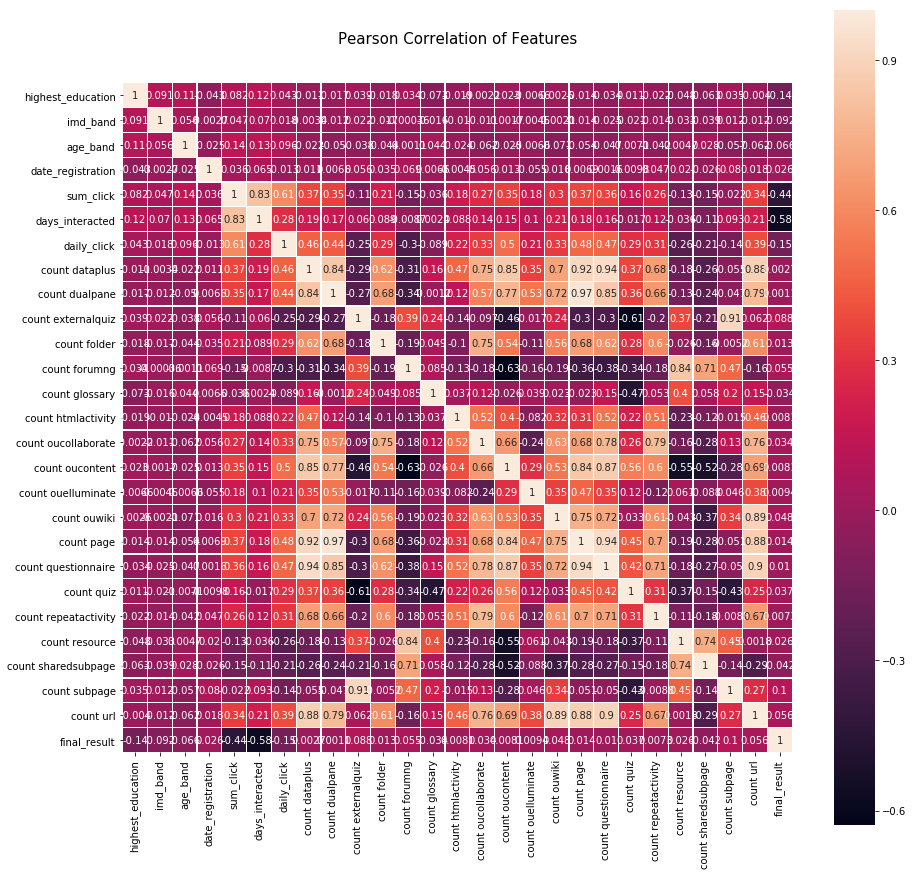

In [28]:
#creating heatmap for corr
import seaborn as sns
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

In [29]:
def get_redundant_pairs(final):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = final.columns
    for i in range(0, final.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(final, n=5):
    au_corr = final.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(final)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [30]:
# Lsiting best correlation pairs
print("Top Absolute Correlations")
print(get_top_abs_correlations(final, 3))

Top Absolute Correlations
count dualpane  count page             0.972302
count dataplus  count questionnaire    0.942190
count page      count questionnaire    0.936344
dtype: float64


In [31]:
# Features most affecting final result
feat = corr.final_result


In [32]:
feat.sort_values(ascending=False)

final_result            1.000000
count subpage           0.104121
count externalquiz      0.087869
count url               0.055699
count forumng           0.054867
count ouwiki            0.047627
count quiz              0.036937
count oucollaborate     0.033911
count resource          0.025777
date_registration       0.025617
count page              0.013925
count folder            0.013167
count questionnaire     0.010382
count ouelluminate      0.009360
count oucontent         0.008093
count htmlactivity      0.008083
count repeatactivity    0.007316
count dataplus          0.002691
count dualpane          0.001103
count glossary         -0.034098
count sharedsubpage    -0.042210
age_band               -0.066500
imd_band               -0.092238
highest_education      -0.140862
daily_click            -0.150993
sum_click              -0.438317
days_interacted        -0.577072
Name: final_result, dtype: float64

(array([  2.,   0.,   2.,  18.,   4.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.57707215, -0.41936493, -0.26165772, -0.1039505 ,  0.05375671,
         0.21146393,  0.36917114,  0.52687836,  0.68458557,  0.84229279,  1.        ]),
 <a list of 10 Patch objects>)

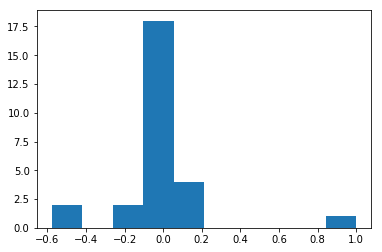

In [33]:
a=feat.sort_values(ascending=False)
plt.hist(a)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C510534EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C5129C85F8>]], dtype=object)

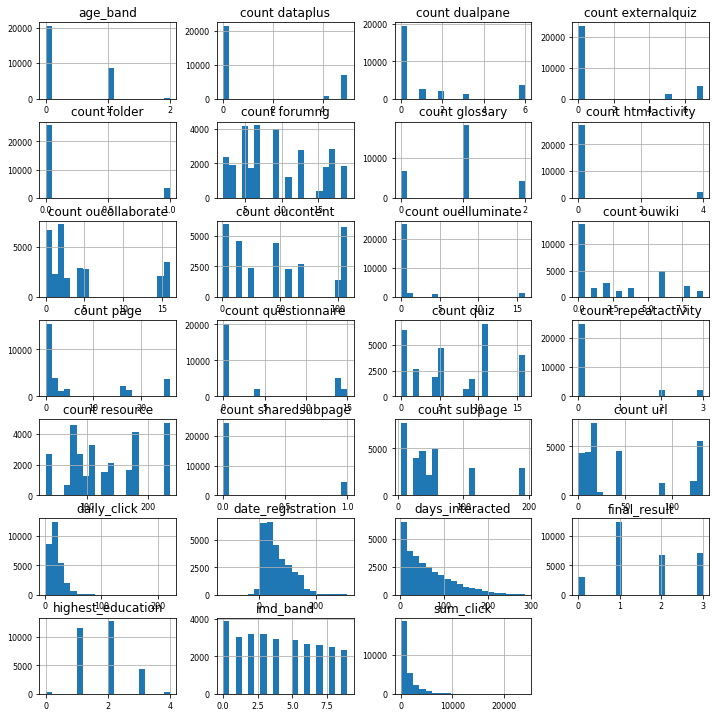

In [34]:
# Plotting histogram for each column
final.hist(figsize=(12,16), layout=(9,4), xlabelsize=8, ylabelsize=8, bins = 20)

In [35]:
# Normalizing X 

from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

# Calculating F-score and P-value for each of the features

from sklearn.feature_selection import f_classif, SelectKBest
Fs, pval = f_classif(X_norm,Y)
print(Fs)
print(pval)


[  2.78290473e+02   1.07793400e+02   6.82772597e+01   3.53120495e+01
   2.52443089e+03   5.40489970e+03   2.58279869e+02   6.87385148e+00
   8.31306443e+00   7.74752386e+01   8.11432955e+00   3.17289580e+01
   8.36717835e+01   1.69309161e+01   1.59482749e+01   1.03152943e+01
   1.65103392e+01   2.88438334e+01   3.89441508e+00   2.93300734e+00
   7.50047080e+01   2.10393111e+00   4.52483010e+01   4.50862861e+01
   1.07402939e+02   3.24747863e+01]
[  4.06439709e-178   2.09123792e-069   5.42963246e-044   9.02799339e-023
   0.00000000e+000   0.00000000e+000   1.90343594e-165   1.26569656e-004
   1.59775179e-005   6.52106585e-050   2.12812211e-005   1.81574915e-020
   6.71718914e-054   5.53167086e-011   2.34124465e-010   8.79375768e-007
   1.02593773e-010   1.29575925e-018   8.55933677e-003   3.21029255e-002
   2.53689490e-048   9.74123576e-002   3.64841282e-029   4.63869699e-029
   3.72573516e-069   6.02164896e-021]


#### Note: Higher F-score and Lower P-value indicate importance of feature

In [36]:
# Finding 5 most significant features out of the 26 features for deeper analysis
selectK = SelectKBest(f_classif, k = 5).fit(X_norm,Y)
selectK.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False], dtype=bool)

In [37]:
X_best = selectK.transform(X_norm)
Y= np.asarray(Y, dtype=int)

## 5. Applying ML models

In [38]:
# Splitting the dataset into train and test sets 70-30
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.30, random_state=0)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_best, Y, test_size=0.30, random_state=0)

### 5a. Naive Bayes - 49% accuracy

In [39]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train, Y_train)

Y_train_pred = nb.predict(X_train)
Y_test_pred = nb.predict(X_test)


print(metrics.classification_report(Y_train, Y_train_pred))
print(metrics.classification_report(Y_test, Y_test_pred))
print("confusion matrix: \n", metrics.confusion_matrix(Y_test,Y_test_pred))
print("Traning accuracy: {}, Testing accuracy: {}".format(metrics.accuracy_score(Y_train, Y_train_pred),
                                                         metrics.accuracy_score(Y_test, Y_test_pred)))

             precision    recall  f1-score   support

          0       0.35      0.27      0.30      2119
          1       0.69      0.50      0.58      8644
          2       0.32      0.30      0.31      4680
          3       0.44      0.71      0.55      5011

avg / total       0.51      0.48      0.48     20454

             precision    recall  f1-score   support

          0       0.35      0.26      0.30       905
          1       0.69      0.51      0.59      3714
          2       0.34      0.32      0.33      1998
          3       0.45      0.71      0.55      2150

avg / total       0.51      0.49      0.49      8767

confusion matrix: 
 [[ 239  467   92  107]
 [ 396 1895  691  732]
 [  34  256  643 1065]
 [  17  141  465 1527]]
Traning accuracy: 0.48381734624034417, Testing accuracy: 0.4909319037298962


### 5b. Logistic Regressiong - 59% accuracy

In [40]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(C = 0.1, multi_class='multinomial', solver = 'newton-cg').fit(X_train, Y_train)

Y_train_pred2 = lg.predict(X_train)
Y_test_pred2 = lg.predict(X_test)

print(metrics.classification_report(Y_train, Y_train_pred2))
print(metrics.classification_report(Y_test, Y_test_pred2))
print("confusion matrix: \n", metrics.confusion_matrix(Y_test, Y_test_pred2))
print("traning accuracy: {}, testing accuracy: {}".format(metrics.accuracy_score(Y_train, Y_train_pred2),
                                                         metrics.accuracy_score(Y_test, Y_test_pred2)))

             precision    recall  f1-score   support

          0       0.55      0.07      0.13      2119
          1       0.64      0.85      0.73      8644
          2       0.45      0.26      0.33      4680
          3       0.58      0.69      0.63      5011

avg / total       0.57      0.60      0.55     20454

             precision    recall  f1-score   support

          0       0.50      0.06      0.11       905
          1       0.64      0.86      0.73      3714
          2       0.45      0.24      0.32      1998
          3       0.58      0.69      0.63      2150

avg / total       0.56      0.59      0.55      8767

confusion matrix: 
 [[  54  813   16   22]
 [  53 3198  269  194]
 [   2  653  489  854]
 [   0  358  319 1473]]
traning accuracy: 0.5966559108242886, testing accuracy: 0.5947302383939774


### 5c. Random Forest -  49% accuracy

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=7, max_features=5, n_estimators=1000, class_weight='balanced').fit(X_train, Y_train)

Y_train_pred3 = rf.predict(X_train)
Y_test_pred3 = rf.predict(X_test)

print(metrics.classification_report(Y_train, Y_train_pred3))
print(metrics.classification_report(Y_test, Y_test_pred3))
print("confusion matrix: \n", metrics.confusion_matrix(Y_test, Y_test_pred3))
print("traning accuracy: {}, testing accuracy: {}".format(metrics.accuracy_score(Y_train, Y_train_pred3),
                                                         metrics.accuracy_score(Y_test, Y_test_pred3)))

             precision    recall  f1-score   support

          0       0.31      0.74      0.43      2119
          1       0.70      0.49      0.58      8644
          2       0.47      0.38      0.42      4680
          3       0.62      0.67      0.64      5011

avg / total       0.58      0.54      0.54     20454

             precision    recall  f1-score   support

          0       0.27      0.69      0.39       905
          1       0.66      0.46      0.54      3714
          2       0.44      0.35      0.39      1998
          3       0.60      0.64      0.62      2150

avg / total       0.55      0.50      0.51      8767

confusion matrix: 
 [[ 620  241   25   19]
 [1427 1713  410  164]
 [ 161  403  703  731]
 [  73  247  452 1378]]
traning accuracy: 0.5351031583064437, testing accuracy: 0.5034789551728072


In [42]:
print(rf.feature_importances_)

[ 0.0330399   0.01278705  0.00427036  0.01676811  0.29633663  0.38541659
  0.05254895  0.00409493  0.00484973  0.00399249  0.0006965   0.02015439
  0.00716342  0.00055188  0.01071353  0.01588101  0.00222312  0.01415197
  0.01378227  0.0031447   0.02052319  0.00066657  0.01577384  0.00434972
  0.02703755  0.02908161]


## 6. Analysis of Result : Selecting best features for Student performance

In [43]:
# Taking mean and sd of columns
col_means = X.mean(axis=0)
col_sd = X.std(axis=0)
print(col_means)
print(col_sd)

[  1.75438897e+00   4.12285685e+00   3.06628794e-01   6.66227371e+01
   1.35529075e+03   6.18739947e+01   1.90415162e+01   1.31378118e+00
   1.11758667e+00   1.26285890e+00   1.18373772e-01   9.37637316e+00
   9.19099278e-01   2.90339140e-01   4.61527668e+00   4.79394613e+01
   1.04558366e+00   2.56900859e+00   5.85397488e+00   3.73241847e+00
   6.80520858e+00   3.60562609e-01   1.29791280e+02   1.60877451e-01
   5.49864823e+01   4.84785599e+01]
[  7.51172603e-01   2.87202928e+00   4.76065733e-01   4.76321442e+01
   1.73364148e+03   5.40276367e+01   1.15755578e+01   2.17767591e+00
   1.99934944e+00   2.58493833e+00   3.23050185e-01   5.22504940e+00
   6.07290351e-01   1.03781489e+00   5.56067897e+00   3.84493843e+01
   3.58509744e+00   3.04001858e+00   9.20132874e+00   6.06482209e+00
   5.43387769e+00   8.98060612e-01   6.18205148e+01   3.67417878e-01
   5.43654478e+01   5.03776790e+01]


In [44]:
# Displaying best features in descending order w.r.t. final_result to track student performance

top_features = []

corr_results = dict(corr.iloc[26])
top_features.extend([k for k in sorted(corr_results, key=corr_results.get, reverse=True)][:10])

[(k, corr_results[k]) for k in sorted(corr_results, key=corr_results.get, reverse=True)]

[('final_result', 1.0),
 ('count subpage', 0.10412079067684751),
 ('count externalquiz', 0.08786947677129775),
 ('count url', 0.055699420314541385),
 ('count forumng', 0.054867219522098554),
 ('count ouwiki', 0.047627465695135311),
 ('count quiz', 0.036936574218751815),
 ('count oucollaborate', 0.033911257999888457),
 ('count resource', 0.025777409261942785),
 ('date_registration', 0.025617114684276025),
 ('count page', 0.013924552828010183),
 ('count folder', 0.013167090171684421),
 ('count questionnaire', 0.010382319302433095),
 ('count ouelluminate', 0.0093602666829254826),
 ('count oucontent', 0.0080925120006923364),
 ('count htmlactivity', 0.0080825428361700775),
 ('count repeatactivity', 0.0073159366060555628),
 ('count dataplus', 0.0026908782294207834),
 ('count dualpane', 0.0011028194121988182),
 ('count glossary', -0.034097890326787776),
 ('count sharedsubpage', -0.04221015905771331),
 ('age_band', -0.066499796926851054),
 ('imd_band', -0.092237991115877938),
 ('highest_educat

In [45]:
# Using Anova to find 10 best features
index = final.columns

anova_top10 = {}
for i in range(10):
    anova_top10[index[i]] = pval[i]
    
top_features.extend([k for k in sorted(anova_top10, key=anova_top10.get, reverse=False)])
[(k, anova_top10[k]) for k in sorted(anova_top10, key=anova_top10.get, reverse=False)]

[('sum_click', 0.0),
 ('days_interacted', 0.0),
 ('highest_education', 4.0643970859196345e-178),
 ('daily_click', 1.9034359420956929e-165),
 ('imd_band', 2.0912379150998403e-69),
 ('count externalquiz', 6.5210658511451561e-50),
 ('age_band', 5.4296324586747911e-44),
 ('date_registration', 9.0279933874513522e-23),
 ('count dualpane', 1.5977517881293157e-05),
 ('count dataplus', 0.00012656965610212363)]

In [46]:
# Extracting best features from Random Forest
index = final.columns

rf_feature_sort = {}
for i in range(len(rf.feature_importances_)):
    rf_feature_sort[index[i]] = rf.feature_importances_[i]

top_features.extend([k for k in sorted(rf_feature_sort, key=rf_feature_sort.get, reverse=True)][:10]) 
[(k, rf_feature_sort[k]) for k in sorted(rf_feature_sort, key=rf_feature_sort.get, reverse=True)]

[('days_interacted', 0.38541658828592573),
 ('sum_click', 0.29633662554624313),
 ('daily_click', 0.052548945628592449),
 ('highest_education', 0.033039899509106789),
 ('count url', 0.029081605040990798),
 ('count subpage', 0.027037552806903065),
 ('count quiz', 0.020523192547463886),
 ('count forumng', 0.020154391600108432),
 ('date_registration', 0.016768105911298251),
 ('count oucontent', 0.015881005777926806),
 ('count resource', 0.015773838639689786),
 ('count ouwiki', 0.014151972738212401),
 ('count page', 0.013782267716078133),
 ('imd_band', 0.012787053851571096),
 ('count oucollaborate', 0.010713527532755463),
 ('count glossary', 0.0071634163400873287),
 ('count dualpane', 0.0048497348334118912),
 ('count sharedsubpage', 0.0043497183395199944),
 ('age_band', 0.0042703639081522445),
 ('count dataplus', 0.0040949341506435963),
 ('count externalquiz', 0.0039924915538422064),
 ('count questionnaire', 0.0031447022128872969),
 ('count ouelluminate', 0.00222311592048081),
 ('count fold

In [47]:
# Finding 5 best features combining these three methods by voting
ct = collections.Counter(top_features)
ct.most_common(5)

[('date_registration', 3),
 ('count subpage', 2),
 ('count externalquiz', 2),
 ('count url', 2),
 ('count forumng', 2)]

In [48]:
# Finding 10 best features combining these three methods by voting
ct = collections.Counter(top_features)
ct.most_common(10)

[('date_registration', 3),
 ('count subpage', 2),
 ('count externalquiz', 2),
 ('count url', 2),
 ('count forumng', 2),
 ('count quiz', 2),
 ('sum_click', 2),
 ('days_interacted', 2),
 ('highest_education', 2),
 ('daily_click', 2)]

## 7. Identifying Major Problem

In [49]:
# X and label Y for ML models
# Gofuping Pass and Distinction together
X = final.iloc[:,:-1].values
Y = final.iloc[:,-1].values
for i in range(len(Y)):
    if Y[i] == 'Pass':
        Y[i] = 0
    elif Y[i] == 'Distinction':
        Y[i] = 0
    elif Y[i] == 'Fail':
        Y[i] = 2
    elif Y[i] == 'Withdrawn':
        Y[i] = 3

In [50]:
final['final_result'] = final['final_result'].astype(int)


c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
# Gives total number of records in final
final.final_result.count()

29221

In [52]:
# Removing all '0' values and focussing on Withdrawal and Fail
final['final_result'] = final['final_result'].replace(1,0) #Replacing 1 for Distinction with 0
final['final_result'] = final['final_result'].replace(0,np.nan)
final = final.dropna(how='any',axis=0)

c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
final

,highest_education,imd_band,age_band,date_registration,sum_click,days_interacted,daily_click,count dataplus,count dualpane,count externalquiz,...,count ouwiki,count page,count questionnaire,count quiz,count repeatactivity,count resource,count sharedsubpage,count subpage,count url,final_result
1,3,3,2,137.0,646.0,56.0,11.535714,0.0,0.0,7.0,...,4.0,0.0,0.0,0.0,0.0,178.0,0.0,194.0,44.0,3.0
2,3,3,2,38.0,10.0,1.0,10.000000,0.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,169.0,0.0,110.0,46.0,3.0
4,1,2,0,47.0,161.0,16.0,10.062500,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,236.0,1.0,37.0,15.0,2.0
13,3,4,0,114.0,997.0,39.0,25.564103,0.0,0.0,0.0,...,0.0,2.0,0.0,16.0,0.0,85.0,0.0,31.0,19.0,3.0
14,3,1,0,68.0,113.0,23.0,4.913043,0.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,169.0,0.0,110.0,46.0,3.0
15,2,2,0,139.0,13.0,1.0,13.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,231.0,1.0,37.0,14.0,3.0
19,3,8,1,47.0,478.0,18.0,26.555556,5.0,6.0,0.0,...,8.0,26.0,14.0,11.0,3.0,136.0,0.0,55.0,132.0,2.0
21,2,2,0,101.0,210.0,29.0,7.241379,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,0.0,104.0,0.0,10.0,6.0,2.0
23,1,1,1,65.0,2638.0,53.0,49.773585,5.0,3.0,0.0,...,6.0,18.0,14.0,11.0,0.0,109.0,0.0,53.0,133.0,2.0
24,1,6,0,74.0,410.0,30.0,13.666667,0.0,0.0,7.0,...,4.0,0.0,0.0,0.0,0.0,178.0,0.0,194.0,44.0,3.0


In [54]:
# No of records with only cases of Fail and Withdrawal
final.final_result.count()

13839

In [55]:
wnp=13839/29221 * 100
wnp

47.359775503918414

### Problem: 47% students have either failed or withdrawn from the program

## 8. Moving towards a Solution - Focusing on Fail and Withdrawn only

In [56]:
corr = final.corr(method='pearson')
corr

,highest_education,imd_band,age_band,date_registration,sum_click,days_interacted,daily_click,count dataplus,count dualpane,count externalquiz,...,count ouwiki,count page,count questionnaire,count quiz,count repeatactivity,count resource,count sharedsubpage,count subpage,count url,final_result
highest_education,1.000000,0.080880,0.103631,-0.040059,0.024274,0.036718,0.025934,-0.030218,-0.034679,0.044218,...,-0.014109,-0.030054,-0.051249,0.027614,-0.030179,-0.058852,-0.077650,0.039017,-0.020561,0.036835
imd_band,0.080880,1.000000,0.042696,-0.007461,0.009875,0.021944,0.011687,-0.005770,-0.015070,0.041661,...,0.012559,-0.012390,-0.022378,-0.005126,-0.009179,-0.045001,-0.068702,0.029843,0.000935,0.019588
age_band,0.103631,0.042696,1.000000,-0.023092,0.104962,0.082463,0.087658,-0.023232,-0.036672,-0.027704,...,-0.049122,-0.039734,-0.037575,0.004199,-0.033344,-0.003264,0.018200,-0.042225,-0.048243,0.028515
date_registration,-0.040059,-0.007461,-0.023092,1.000000,0.017507,0.029381,-0.010265,-0.006852,-0.002875,0.048137,...,0.000179,-0.001608,-0.008482,0.005393,0.030161,0.011004,-0.024892,0.078730,0.002319,0.086086
sum_click,0.024274,0.009875,0.104962,0.017507,1.000000,0.813666,0.503280,0.278319,0.275174,-0.052394,...,0.239376,0.286542,0.261819,0.109256,0.154141,-0.069432,-0.114532,0.004519,0.271119,-0.143275
days_interacted,0.036718,0.021944,0.082463,0.029381,0.813666,1.000000,0.188886,0.121165,0.118037,0.112341,...,0.178236,0.118965,0.096899,-0.031219,0.051818,0.029814,-0.087742,0.127755,0.169638,-0.195063
daily_click,0.025934,0.011687,0.087658,-0.010265,0.503280,0.188886,1.000000,0.341371,0.331874,-0.192769,...,0.236276,0.356143,0.339024,0.209571,0.205843,-0.198034,-0.147527,-0.118509,0.283965,-0.006048
count dataplus,-0.030218,-0.005770,-0.023232,-0.006852,0.278319,0.121165,0.341371,1.000000,0.859727,-0.319094,...,0.691284,0.935139,0.962608,0.360125,0.682406,-0.198773,-0.252519,-0.090415,0.889825,-0.003021
count dualpane,-0.034679,-0.015070,-0.036672,-0.002875,0.275174,0.118037,0.331874,0.859727,1.000000,-0.297751,...,0.689985,0.972505,0.857568,0.326201,0.653953,-0.143096,-0.235628,-0.088401,0.787936,-0.030111
count externalquiz,0.044218,0.041661,-0.027704,0.048137,-0.052394,0.112341,-0.192769,-0.319094,-0.297751,1.000000,...,0.249248,-0.331673,-0.329705,-0.662933,-0.215086,0.398535,-0.225928,0.918163,0.047629,0.047351


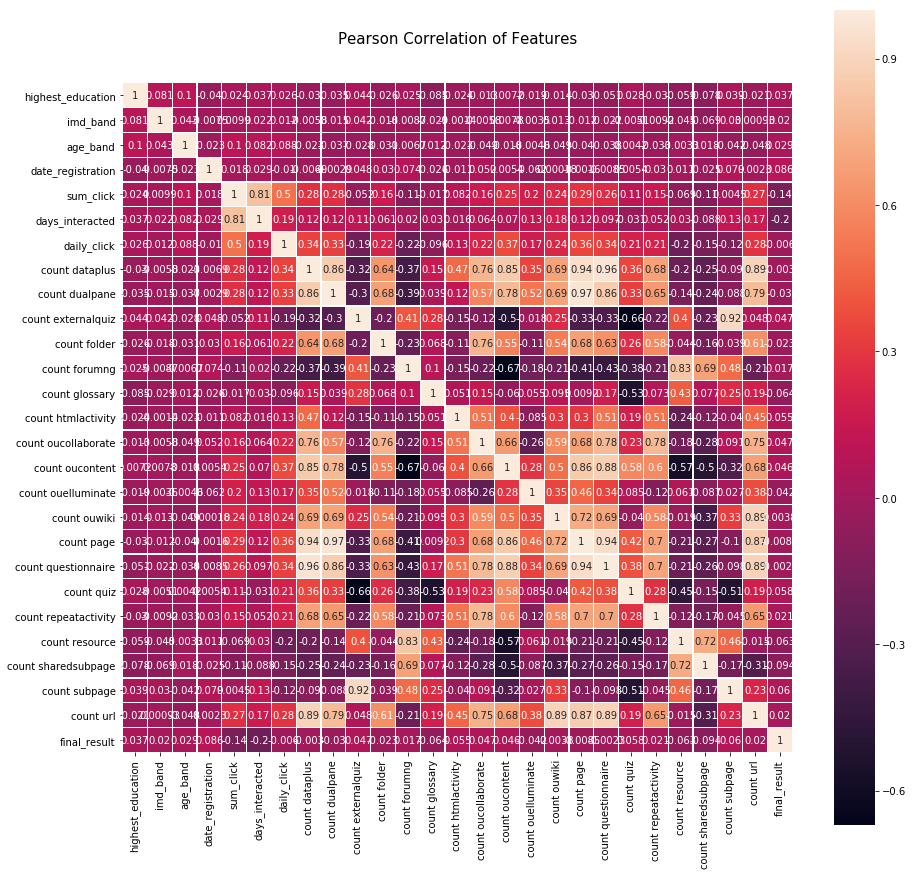

In [57]:
#creating heatmap for corr
import seaborn as sns
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

In [58]:
# Features most affecting final result for Fail and Withdrawal
feat = corr.final_result

In [59]:
feat.sort_values(ascending=False)

final_result            1.000000
date_registration       0.086086
count subpage           0.060298
count quiz              0.057852
count htmlactivity      0.054900
count externalquiz      0.047351
count oucollaborate     0.047034
count oucontent         0.046272
highest_education       0.036835
age_band                0.028515
count repeatactivity    0.021027
count url               0.019775
imd_band                0.019588
count forumng           0.017072
count ouwiki            0.003814
count questionnaire    -0.002274
count dataplus         -0.003021
daily_click            -0.006048
count page             -0.008520
count folder           -0.023219
count dualpane         -0.030111
count ouelluminate     -0.042314
count resource         -0.063282
count glossary         -0.063889
count sharedsubpage    -0.094386
sum_click              -0.143275
days_interacted        -0.195063
Name: final_result, dtype: float64

In [60]:
# Splitting the dataset into train and test sets 70-30
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.30, random_state=0)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_best, Y, test_size=0.30, random_state=0)

In [61]:
final.head

<bound method NDFrame.head of        highest_education  imd_band  age_band  date_registration  sum_click  \
1                      3         3         2              137.0      646.0   
2                      3         3         2               38.0       10.0   
4                      1         2         0               47.0      161.0   
13                     3         4         0              114.0      997.0   
14                     3         1         0               68.0      113.0   
15                     2         2         0              139.0       13.0   
19                     3         8         1               47.0      478.0   
21                     2         2         0              101.0      210.0   
23                     1         1         1               65.0     2638.0   
24                     1         6         0               74.0      410.0   
25                     1         6         0              131.0      100.0   
27                     1         4

## 9. Going deeper into this data

In [62]:
# X and label Y for ML models
X = final.iloc[:,:-1].values
Y = final.iloc[:,-1].values

import pandas as pd
from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(final)
df_normalized = pd.DataFrame(final)
df_normalized

,highest_education,imd_band,age_band,date_registration,sum_click,days_interacted,daily_click,count dataplus,count dualpane,count externalquiz,...,count ouwiki,count page,count questionnaire,count quiz,count repeatactivity,count resource,count sharedsubpage,count subpage,count url,final_result
1,3,3,2,137.0,646.0,56.0,11.535714,0.0,0.0,7.0,...,4.0,0.0,0.0,0.0,0.0,178.0,0.0,194.0,44.0,3.0
2,3,3,2,38.0,10.0,1.0,10.000000,0.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,169.0,0.0,110.0,46.0,3.0
4,1,2,0,47.0,161.0,16.0,10.062500,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,236.0,1.0,37.0,15.0,2.0
13,3,4,0,114.0,997.0,39.0,25.564103,0.0,0.0,0.0,...,0.0,2.0,0.0,16.0,0.0,85.0,0.0,31.0,19.0,3.0
14,3,1,0,68.0,113.0,23.0,4.913043,0.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,169.0,0.0,110.0,46.0,3.0
15,2,2,0,139.0,13.0,1.0,13.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,231.0,1.0,37.0,14.0,3.0
19,3,8,1,47.0,478.0,18.0,26.555556,5.0,6.0,0.0,...,8.0,26.0,14.0,11.0,3.0,136.0,0.0,55.0,132.0,2.0
21,2,2,0,101.0,210.0,29.0,7.241379,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,0.0,104.0,0.0,10.0,6.0,2.0
23,1,1,1,65.0,2638.0,53.0,49.773585,5.0,3.0,0.0,...,6.0,18.0,14.0,11.0,0.0,109.0,0.0,53.0,133.0,2.0
24,1,6,0,74.0,410.0,30.0,13.666667,0.0,0.0,7.0,...,4.0,0.0,0.0,0.0,0.0,178.0,0.0,194.0,44.0,3.0


In [63]:
# Normalizing X 

from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

# Calculating F-score and P-value for each of the features

from sklearn.feature_selection import f_classif, SelectKBest
Fs, pval = f_classif(X_norm,Y)
print(Fs)
print(pval)


[  1.87993810e+01   5.31132202e+00   1.12599132e+01   1.03307726e+02
   2.89995089e+02   5.47320017e+02   5.06199690e-01   1.26287631e-01
   1.25574017e+01   3.10933469e+01   7.46416048e+00   4.03389080e+00
   5.67112699e+01   4.18315973e+01   3.06780237e+01   2.96894946e+01
   2.48197084e+01   2.01258763e-01   1.00456089e+00   7.15323893e-02
   4.64652505e+01   6.12031091e+00   5.56350508e+01   1.24379118e+02
   5.04933144e+01   5.41295596e+00]
[  1.46241022e-005   2.12020051e-002   7.94119177e-004   3.48911807e-024
   2.25384135e-064   9.58824589e-119   4.76800619e-001   7.22318054e-001
   3.95940610e-004   2.50516940e-008   6.30192151e-003   4.46143757e-002
   5.35934339e-014   1.02825184e-010   3.10150114e-008   5.15762742e-008
   6.37104325e-007   6.53713747e-001   3.16226943e-001   7.89122538e-001
   9.71201099e-012   1.33756360e-002   9.24425467e-014   9.22914594e-029
   1.25420530e-012   2.00022056e-002]


In [64]:
# Finding 5 most significant features out of the 26 features for deeper analysis
selectK = SelectKBest(f_classif, k = 5).fit(X_norm,Y)
selectK.get_support()

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False], dtype=bool)

In [65]:
X_best = selectK.transform(X_norm)
Y= np.asarray(Y, dtype=int)

In [66]:
# Splitting the dataset into train and test sets 70-30
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.30, random_state=0)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_best, Y, test_size=0.30, random_state=0)

### 9a. Naive Bayes - 59% accuracy

In [67]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train, Y_train)

Y_train_pred = nb.predict(X_train)
Y_test_pred = nb.predict(X_test)


print(metrics.classification_report(Y_train, Y_train_pred))
print(metrics.classification_report(Y_test, Y_test_pred))
print("confusion matrix: \n", metrics.confusion_matrix(Y_test,Y_test_pred))
print("Traning accuracy: {}, Testing accuracy: {}".format(metrics.accuracy_score(Y_train, Y_train_pred),
                                                         metrics.accuracy_score(Y_test, Y_test_pred)))

             precision    recall  f1-score   support

          2       0.61      0.42      0.50      4726
          3       0.57      0.75      0.65      4961

avg / total       0.59      0.59      0.58      9687

             precision    recall  f1-score   support

          2       0.60      0.40      0.48      1952
          3       0.59      0.76      0.67      2200

avg / total       0.60      0.59      0.58      4152

confusion matrix: 
 [[ 790 1162]
 [ 521 1679]]
Traning accuracy: 0.5874883864973676, Testing accuracy: 0.5946531791907514


### 9b. Logistic Regression - 63% accuracy

In [68]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(C = 0.1, multi_class='multinomial', solver = 'newton-cg').fit(X_train, Y_train)

Y_train_pred2 = lg.predict(X_train)
Y_test_pred2 = lg.predict(X_test)

print(metrics.classification_report(Y_train, Y_train_pred2))
print(metrics.classification_report(Y_test, Y_test_pred2))
print("confusion matrix: \n", metrics.confusion_matrix(Y_test, Y_test_pred2))
print("traning accuracy: {}, testing accuracy: {}".format(metrics.accuracy_score(Y_train, Y_train_pred2),
                                                         metrics.accuracy_score(Y_test, Y_test_pred2)))

             precision    recall  f1-score   support

          2       0.64      0.58      0.61      4726
          3       0.63      0.69      0.66      4961

avg / total       0.64      0.64      0.64      9687

             precision    recall  f1-score   support

          2       0.62      0.55      0.58      1952
          3       0.64      0.70      0.67      2200

avg / total       0.63      0.63      0.63      4152

confusion matrix: 
 [[1073  879]
 [ 653 1547]]
traning accuracy: 0.6381748735418602, testing accuracy: 0.6310211946050096


### 9c. Random Forest - 63% accuracy

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=7, max_features=5, n_estimators=1000, class_weight='balanced').fit(X_train, Y_train)

Y_train_pred3 = rf.predict(X_train)
Y_test_pred3 = rf.predict(X_test)

print(metrics.classification_report(Y_train, Y_train_pred3))
print(metrics.classification_report(Y_test, Y_test_pred3))
print("confusion matrix: \n", metrics.confusion_matrix(Y_test, Y_test_pred3))
print("traning accuracy: {}, testing accuracy: {}".format(metrics.accuracy_score(Y_train, Y_train_pred3),
                                                         metrics.accuracy_score(Y_test, Y_test_pred3)))

             precision    recall  f1-score   support

          2       0.66      0.69      0.67      4726
          3       0.69      0.66      0.67      4961

avg / total       0.67      0.67      0.67      9687

             precision    recall  f1-score   support

          2       0.61      0.64      0.62      1952
          3       0.66      0.63      0.65      2200

avg / total       0.64      0.64      0.64      4152

confusion matrix: 
 [[1241  711]
 [ 804 1396]]
traning accuracy: 0.6739960772168886, testing accuracy: 0.6351156069364162


In [70]:
print(rf.feature_importances_)

[ 0.01799863  0.03062731  0.01319861  0.07402956  0.15600155  0.22442234
  0.07758459  0.00142517  0.00769443  0.00581612  0.0025066   0.05945669
  0.01033344  0.00280256  0.04796918  0.03035596  0.00293637  0.01309168
  0.0163028   0.00472578  0.04519568  0.00169421  0.03988098  0.01414006
  0.05077882  0.04903088]


## 10. Final Analysis

In [80]:
# Taking mean and sd of columns
col_means = X.mean(axis=0)
col_sd = X.std(axis=0)
print(col_means)
print(col_sd)

[  1.64397717e+00   3.82860033e+00   2.72852085e-01   6.67616157e+01
   5.62410145e+02   2.88528073e+01   1.71323818e+01   1.30255076e+00
   1.12356384e+00   1.46079919e+00   1.23563841e-01   9.63834092e+00
   8.90888070e-01   2.90194378e-01   4.74434569e+00   4.77517162e+01
   1.09820074e+00   2.69896669e+00   5.98547583e+00   3.77744057e+00
   7.06720139e+00   3.62526194e-01   1.31868343e+02   1.51672809e-01
   6.00546282e+01   5.09940747e+01]
[  7.36016914e-01   2.81556583e+00   4.56956454e-01   4.79956014e+01
   8.48910736e+02   3.06066834e+01   1.17783550e+01   2.18108953e+00
   2.01624134e+00   2.73396479e+00   3.29083300e-01   5.00475167e+00
   6.01275290e-01   1.03757638e+00   5.59483916e+00   3.87489757e+01
   3.62322981e+00   3.09782102e+00   9.24972909e+00   6.12167092e+00
   5.69607123e+00   9.00586560e-01   6.03115033e+01   3.58703454e-01
   5.61461380e+01   5.01171829e+01]


In [85]:
# Displaying 10 best features in descending order w.r.t. final_result to track student performance - FAIL and WITHDRAW

top_features = []

corr_results = dict(corr.iloc[26])
top_features.extend([k for k in sorted(corr_results, key=corr_results.get, reverse=True)][:10])

[(k, corr_results[k]) for k in sorted(corr_results, key=corr_results.get, reverse=True)]

[('final_result', 1.0),
 ('date_registration', 0.086085542383788752),
 ('count subpage', 0.060298291630038844),
 ('count quiz', 0.057851577049014738),
 ('count htmlactivity', 0.054900433120586609),
 ('count externalquiz', 0.047350585983275073),
 ('count oucollaborate', 0.047033989117011565),
 ('count oucontent', 0.046271652186043122),
 ('highest_education', 0.036834601965009962),
 ('age_band', 0.028514773025065967),
 ('count repeatactivity', 0.021026633531643517),
 ('count url', 0.019774765680662304),
 ('imd_band', 0.019588311886371931),
 ('count forumng', 0.01707174058265561),
 ('count ouwiki', 0.0038137592167607091),
 ('count questionnaire', -0.0022736796387237256),
 ('count dataplus', -0.0030210468197727925),
 ('daily_click', -0.0060482818792251848),
 ('count page', -0.0085202315722587921),
 ('count folder', -0.023219475668236237),
 ('count dualpane', -0.030111469170905625),
 ('count ouelluminate', -0.04231440266778675),
 ('count resource', -0.063282252741435188),
 ('count glossary'

In [87]:
# Using Anova to find 10 best features
index = final.columns
top_features = []


anova_top10 = {}
for i in range(10):
    anova_top10[index[i]] = pval[i]
    
top_features.extend([k for k in sorted(anova_top10, key=anova_top10.get, reverse=False)])
[(k, anova_top10[k]) for k in sorted(anova_top10, key=anova_top10.get, reverse=False)]

[('days_interacted', 9.5882458873469527e-119),
 ('sum_click', 2.2538413501212967e-64),
 ('date_registration', 3.4891180678744023e-24),
 ('count externalquiz', 2.5051693997621333e-08),
 ('highest_education', 1.4624102188195593e-05),
 ('count dualpane', 0.00039594060968423632),
 ('age_band', 0.00079411917697016013),
 ('imd_band', 0.021202005077540741),
 ('daily_click', 0.47680061894077441),
 ('count dataplus', 0.72231805431037888)]

In [91]:
# Extracting best features from Random Forest
index = final.columns

rf_feature_sort = {}
for i in range(len(rf.feature_importances_)):
    rf_feature_sort[index[i]] = rf.feature_importances_[i]

top_features.extend([k for k in sorted(rf_feature_sort, key=rf_feature_sort.get, reverse=True)][:10]) 
[(k, rf_feature_sort[k]) for k in sorted(rf_feature_sort, key=rf_feature_sort.get, reverse=True)]

[('days_interacted', 0.22442234132921254),
 ('sum_click', 0.15600155129322343),
 ('daily_click', 0.077584585580764948),
 ('date_registration', 0.074029556753863093),
 ('count forumng', 0.05945668799354592),
 ('count subpage', 0.050778823247058798),
 ('count url', 0.049030877185478758),
 ('count oucollaborate', 0.04796918060780539),
 ('count quiz', 0.04519567743911411),
 ('count resource', 0.03988098220225815),
 ('imd_band', 0.030627314975628844),
 ('count oucontent', 0.030355959017193113),
 ('highest_education', 0.017998634534480383),
 ('count page', 0.016302798753722588),
 ('count sharedsubpage', 0.014140057612356784),
 ('age_band', 0.013198606301380388),
 ('count ouwiki', 0.013091680634365077),
 ('count glossary', 0.010333439305955368),
 ('count dualpane', 0.0076944339240950024),
 ('count externalquiz', 0.0058161188951008991),
 ('count questionnaire', 0.0047257844137659913),
 ('count ouelluminate', 0.0029363656156593059),
 ('count htmlactivity', 0.0028025556429029886),
 ('count folde

In [92]:
# Finding 5 best features combining these three methods by voting
ct = collections.Counter(top_features)
ct.most_common(5)

[('days_interacted', 3),
 ('sum_click', 3),
 ('date_registration', 3),
 ('daily_click', 3),
 ('count forumng', 2)]

In [93]:
# Finding 10 best features combining these three methods by voting
ct = collections.Counter(top_features)
ct.most_common(10)

[('days_interacted', 3),
 ('sum_click', 3),
 ('date_registration', 3),
 ('daily_click', 3),
 ('count forumng', 2),
 ('count subpage', 2),
 ('count url', 2),
 ('count oucollaborate', 2),
 ('count quiz', 2),
 ('count resource', 2)]